#  autoEncoder

In [1]:
import numpy as np

np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model  # 泛型模型
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, y_test) = mnist.load_data()

## 数据预处理

In [3]:
x_train = x_train.astype('float32') / 255. - 0.5  # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5  # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## 压缩特征维度至2维

In [5]:
encoding_dim = 2
# this is our input placeholder
input_img = Input(shape=(784,))

In [6]:
# 编码层
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
# 解码层
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)


In [7]:
# 构建自编码模型
autoencoder = Model(inputs=input_img, outputs=decoded)


In [8]:
# 构建编码模型
encoder = Model(inputs=input_img, outputs=encoder_output)

# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# training
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True)


Epoch 1/20
60000/60000 [==============================] - 23s 378us/step - loss: 0.0690
Epoch 2/20
60000/60000 [==============================] - 23s 379us/step - loss: 0.0540
Epoch 3/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.0502
Epoch 4/20
60000/60000 [==============================] - 26s 438us/step - loss: 0.0481
Epoch 5/20
60000/60000 [==============================] - 25s 409us/step - loss: 0.0467
Epoch 6/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.0457
Epoch 7/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.0446
Epoch 8/20
60000/60000 [==============================] - 24s 403us/step - loss: 0.0440
Epoch 9/20
60000/60000 [==============================] - 26s 435us/step - loss: 0.0435
Epoch 10/20
60000/60000 [==============================] - 26s 436us/step - loss: 0.0430
Epoch 11/20
60000/60000 [==============================] - 23s 390us/step - loss: 0.0427
Epoch 12/20
60000/60000 [=====

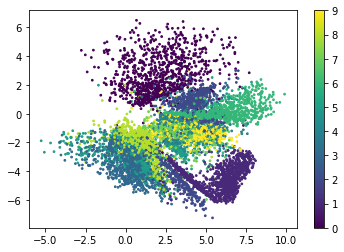

In [9]:

# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, s=3)
plt.colorbar()



In [11]:
encoded_imgs.shape

(10000, 2)

In [12]:
x_test.shape

(10000, 784)